Problem Statement 3: Write a Python program that reads the “Credit Card Customer Data.csv”
(provided on LMS) The following are the tasks that need to be taken into consideration while
constructing the solution to Segregate customers based on the data provided with the help of kmeans clustering.
Tasks to be performed:
1. Load the Given CSV file into a DataFrame
2. Find missing values and drop the unnecessary columns
3. Univariate and bivariate analysis
4. Standardize the whole dataset
5. Find the within-cluster sum of square
6. Find silhouette score
7. Use a line plot using matplotlib to find scores for different sizes of K and choose the best
size for the cluster and build the final model
8. Observe Cluster behavior with different columns
9. Print Co-ordinates of all centroids and silhouette scores for the final model



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("Credit Card Customer Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
df=df.drop(['Sl_No','Customer Key'], axis=1)
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


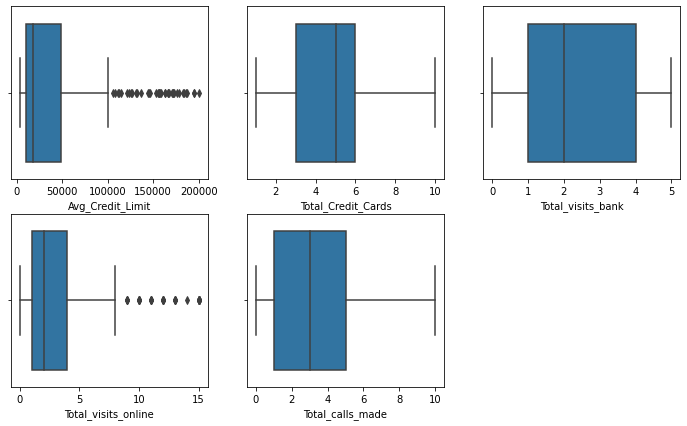

In [ ]:
plt.rcParams["figure.figsize"] = (12,7)
fig, axes = plt.subplots(nrows=2, ncols=3)
a= sns.boxplot( x='Avg_Credit_Limit', data=df , ax=axes[0,0])
b= sns.boxplot(x='Total_Credit_Cards', data=df ,ax=axes[0,1])
c=sns.boxplot(x='Total_visits_bank', data=df ,ax=axes[0,2])
d= sns.boxplot(x='Total_visits_online', data=df ,ax=axes[1,0])
e= sns.boxplot(x='Total_calls_made', data=df ,ax=axes[1,1])
axes[1,2].axis('off')
plt.show()

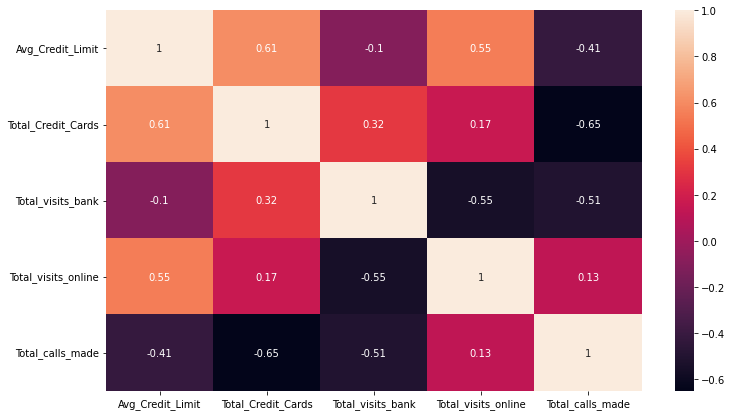

In [ ]:
sns.heatmap(df.corr(), annot =True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [ ]:
sc= StandardScaler()
df.iloc[:,:]= sc.fit_transform(df.iloc[:,:])

In [ ]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [ ]:
inertia = []
for i in range(2,15):
  km = KMeans(n_clusters=i)
  km.fit(df)
  inertia.append(km.inertia_)
print(inertia)

[2040.9898164784945, 933.0437490000536, 780.7736895551766, 704.600065099396, 642.2763517120097, 600.059265475536, 564.5820093534367, 538.4098329770343, 511.9969994945859, 482.4683563621807, 463.68771493561223, 448.59954754144024, 422.5371078655586]


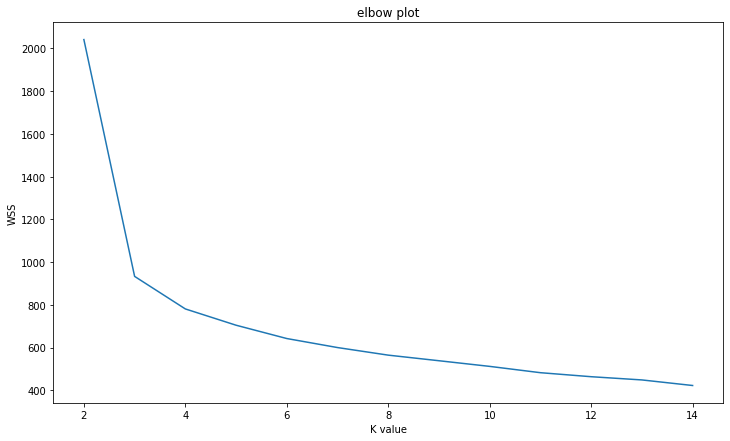

In [ ]:
plt.plot(range(2,15), inertia)
plt.xlabel("K value")
plt.ylabel("WSS")
plt.title("elbow plot")
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
km.fit(df)
a=km.inertia_
df['KM cluster']= km.labels_

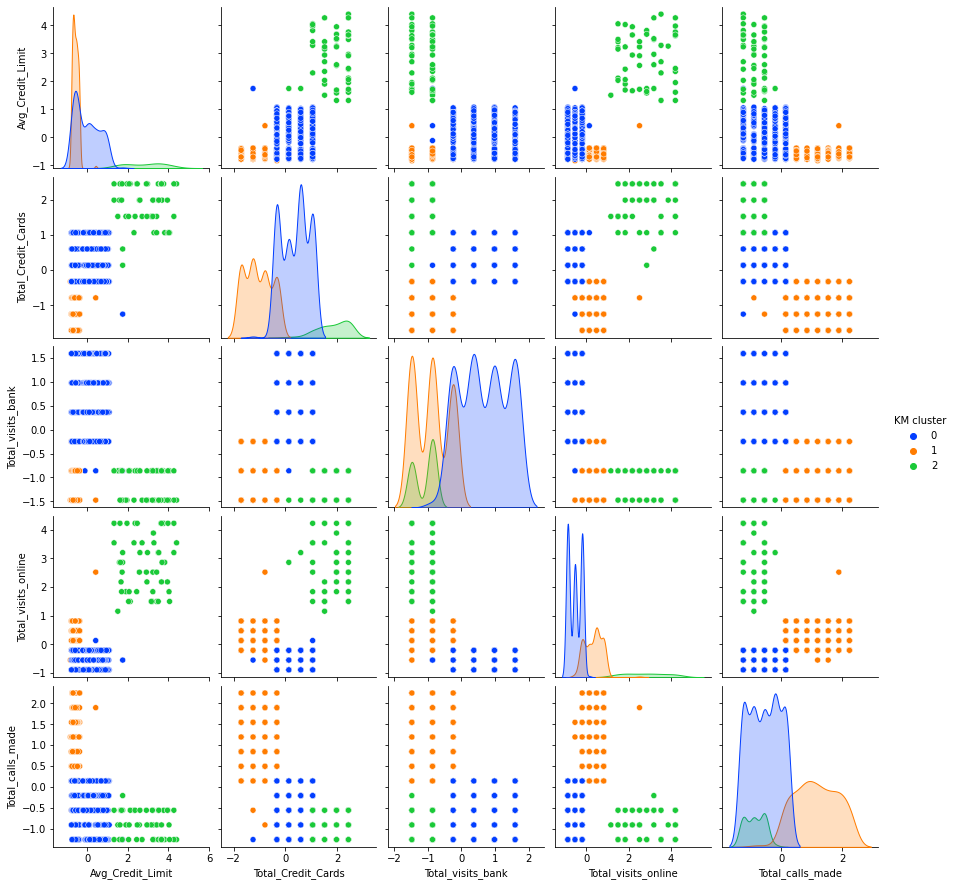

In [ ]:
sns.pairplot(df, hue="KM cluster", palette = 'bright')
plt.show()

In [ ]:
silhouette_score(df, km.labels_)

0.5411228112448502

In [ ]:
km.cluster_centers_

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])